In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    "Isolation Forest":            [0.5371253, 0.6463788, 0.5154885, 0.6197230],
    "Isolation Forest + PCA":      [0.5246683, 0.7071588, 0.5316092, 0.8355956],
    "Markus Method":               [0.5169042, 0.6229248, 0.6027874, 0.5378393],
    "One-Class SVM":               [0.5802457, 0.6330641, 0.6067816, 0.6142936],
    "One-Class SVM + PCA":         [0.5371253, 0.6342061, 0.5616092, 0.5731579],
    "Autoencoder":                 [0.54813268, 0.76651811, 0.58862069, 0.85063712]
}


In [4]:
df = pd.DataFrame([
    {"Method": method, "AUC": auc}
    for method, aucs in data.items()
    for auc in aucs
])


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_49776/1210653681.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_aucs = df.groupby("Method")["AUC"].mean().sort_values(ascending=False)


<Figure size 1000x600 with 0 Axes>

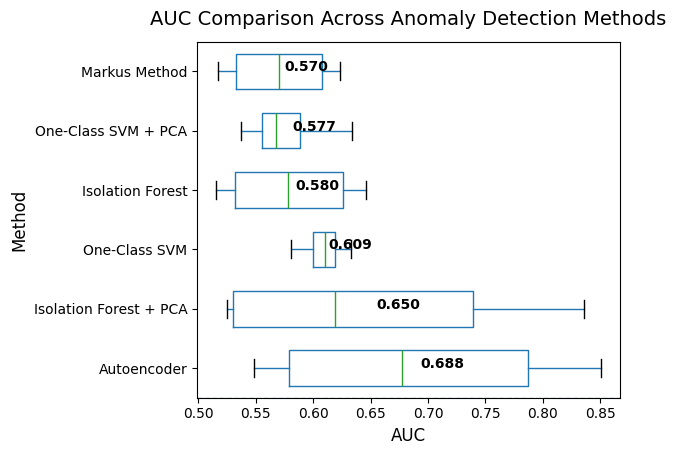

In [14]:
# Order methods by decreasing mean AUC
mean_aucs = df.groupby("Method")["AUC"].mean().sort_values(ascending=False)
ordered_methods = mean_aucs.index.tolist()

# Reorder dataframe
df["Method"] = pd.Categorical(df["Method"], categories=ordered_methods, ordered=True)
df = df.sort_values("Method")

# --- Plot ---
plt.figure(figsize=(10, 6))

box = df.boxplot(
    column="AUC",
    by="Method",
    vert=False,
    grid=False,
    rot=0,
    widths=0.6,
)

# Styling
plt.suptitle("")
plt.title("AUC Comparison Across Anomaly Detection Methods", fontsize=14, pad=12)
plt.ylabel("Method", fontsize=12)
plt.xlabel("AUC", fontsize=12)

# Horizontal baseline
plt.axhline(0.5, linestyle="--", linewidth=1, alpha=0.6)

# Annotate mean AUCs
for i, (method, mean_auc) in enumerate(mean_aucs.items(), start=1):
    plt.text(
        mean_auc + 0.005, i,
        f"{mean_auc:.3f}",
        #va="top",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

per-machine visualisation

In [15]:
data = {
    "Machine ID": ["00", "02", "04", "06"],

    "Isolation Forest":            [0.5371253, 0.6463788, 0.5154885, 0.6197230],
    "Isolation Forest + PCA":      [0.5246683, 0.7071588, 0.5316092, 0.8355956],
    "Markus Method":               [0.5169042, 0.6229248, 0.6027874, 0.5378393],
    "One-Class SVM":               [0.5802457, 0.6330641, 0.6067816, 0.6142936],
    "One-Class SVM + PCA":         [0.5371253, 0.6342061, 0.5616092, 0.5731579],
    "Autoencoder":                 [0.54813268, 0.76651811, 0.58862069, 0.85063712],
}

df = pd.DataFrame(data)


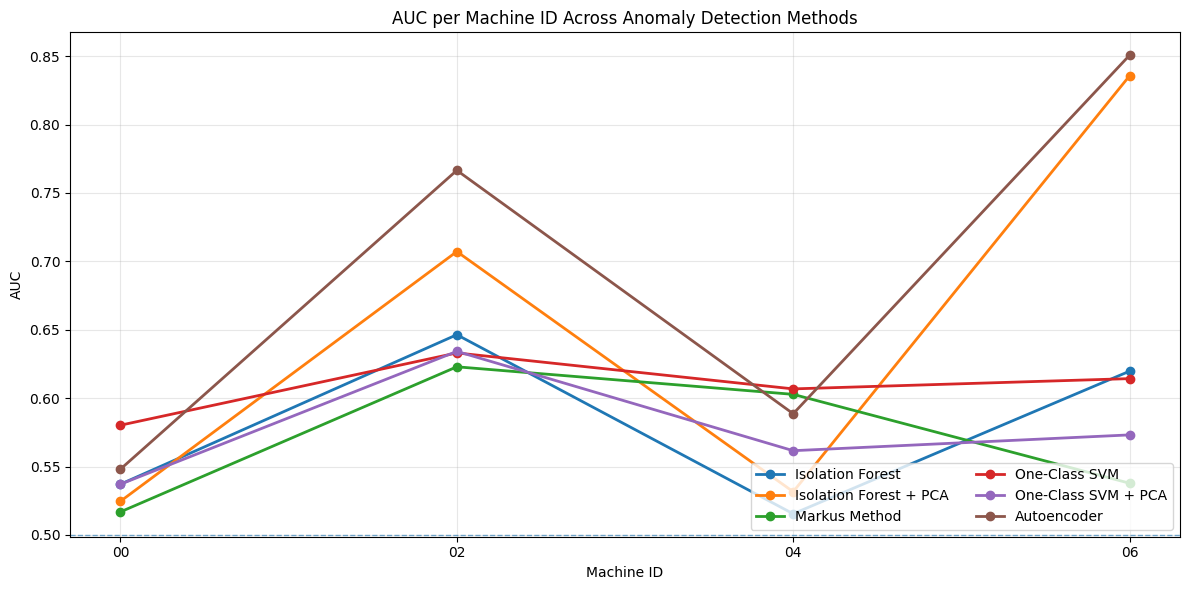

In [16]:
plt.figure(figsize=(12, 6))

methods = df.columns[1:]
x = np.arange(len(df["Machine ID"]))

for method in methods:
    plt.plot(
        x,
        df[method],
        marker="o",
        linewidth=2,
        label=method
    )

plt.xticks(x, df["Machine ID"])
plt.xlabel("Machine ID")
plt.ylabel("AUC")
plt.title("AUC per Machine ID Across Anomaly Detection Methods")

# Random baseline
plt.axhline(0.5, linestyle="--", linewidth=1, alpha=0.6)

plt.legend(
    loc="lower right",
    ncol=2,
    frameon=True
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


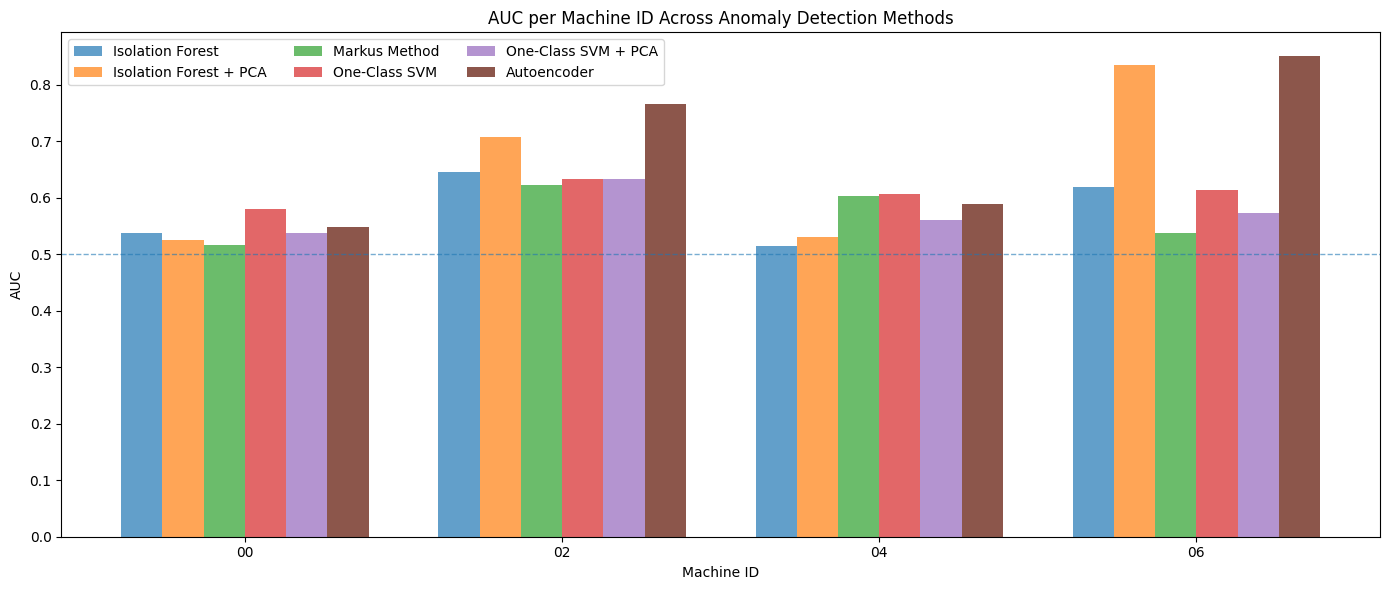

In [18]:
machine_ids = ["00", "02", "04", "06"]
data = {
    "Isolation Forest":       [0.5371253, 0.6463788, 0.5154885, 0.6197230],
    "Isolation Forest + PCA": [0.5246683, 0.7071588, 0.5316092, 0.8355956],
    "Markus Method":          [0.5169042, 0.6229248, 0.6027874, 0.5378393],
    "One-Class SVM":          [0.5802457, 0.6330641, 0.6067816, 0.6142936],
    "One-Class SVM + PCA":    [0.5371253, 0.6342061, 0.5616092, 0.5731579],
    "Autoencoder":            [0.54813268, 0.76651811, 0.58862069, 0.85063712],
}
methods = list(data.keys())

x = np.arange(len(machine_ids))          # positions for machine IDs
width = 0.13                              # bar width

plt.figure(figsize=(14, 6))

for i, method in enumerate(methods):
    offset = (i - len(methods)/2) * width + width/2

    plt.bar(
        x + offset,
        data[method],
        width=width,
        label=method,
        alpha=1.0 if method == "Autoencoder" else 0.7
    )

plt.xticks(x, machine_ids)
plt.xlabel("Machine ID")
plt.ylabel("AUC")
plt.title("AUC per Machine ID Across Anomaly Detection Methods")

# Random baseline
plt.axhline(0.5, linestyle="--", linewidth=1, alpha=0.6)

plt.legend(
    ncol=3,
    loc="upper left",
    frameon=True
)

plt.tight_layout()
plt.show()
